In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split,validation_curve, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV, StratifiedShuffleSplit, RepeatedStratifiedKFold, cross_validate, TunedThresholdClassifierCV, FixedThresholdClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay,classification_report, recall_score, precision_score, accuracy_score, RocCurveDisplay, precision_recall_curve, roc_curve, precision_recall_curve
from IPython.display import display_html
from sklearn.svm import SVC
from sklearn import svm

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
df = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)
mask = X_test.notna().all(axis = 1)
X_test[mask]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.7,0.270,0.68,3.50,0.358,5.0,10.0,0.99720,3.25,1.08,9.9
1,7.1,0.660,0.00,2.40,0.052,6.0,11.0,0.99318,3.35,0.66,12.7
2,10.6,1.025,0.43,2.80,0.080,21.0,84.0,0.99850,3.06,0.57,10.1
3,6.1,0.560,0.00,2.20,0.079,6.0,9.0,0.99480,3.59,0.54,11.5
4,10.7,0.400,0.37,1.90,0.081,17.0,29.0,0.99674,3.12,0.65,11.2
...,...,...,...,...,...,...,...,...,...,...,...
335,7.1,0.590,0.01,2.50,0.077,20.0,85.0,0.99746,3.55,0.59,9.8
336,6.7,0.700,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6
337,8.4,0.520,0.22,2.70,0.084,4.0,18.0,0.99682,3.26,0.57,9.9
338,7.8,0.590,0.33,2.00,0.074,24.0,120.0,0.99680,3.25,0.54,9.4


In [7]:
df = df.dropna()
df = df.drop_duplicates()
X_train = df.drop(['quality'], axis = 1)
y_train = df.quality.apply(lambda x: 1 if x > 6 else 0)

In [8]:
# Блок обучения модели

In [9]:
model_k = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', KNeighborsClassifier(n_neighbors = 46, p = 1, weights = 'distance', n_jobs = -1))])
model = FixedThresholdClassifier(model_k, threshold = 0.55)
model.fit(X_train, y_train)

FixedThresholdClassifier(estimator=Pipeline(steps=[('preprocessing',
                                                    StandardScaler()),
                                                   ('classifier',
                                                    KNeighborsClassifier(n_jobs=-1,
                                                                         n_neighbors=46,
                                                                         p=1,
                                                                         weights='distance'))]),
                         threshold=0.55)

In [10]:
# Блок предсказания с использованием тестового набора

In [11]:
y_predict = model.predict(X_test[mask])

In [12]:
# Вектора предсказанных значений  y_predict полученый на основане тестового набора
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

precision : 0.8181818181818182


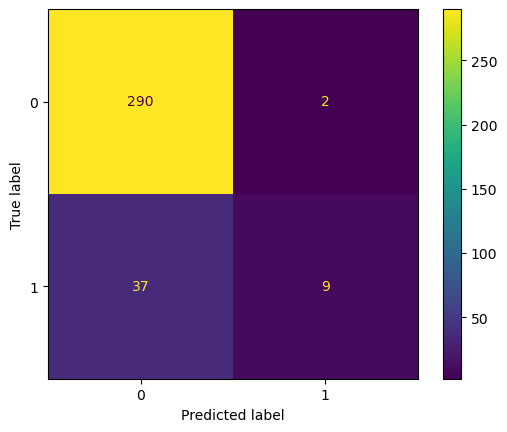

In [13]:
y_true = np.where(pd.read_csv('y_true.csv')[mask].values.reshape(-1)>=7,1,0)
print('precision :', precision_score(y_true, y_predict, zero_division=np.nan))
ConfusionMatrixDisplay.from_predictions(y_true, y_predict);